## Expand Gene identities

In [1]:
# %reset
import pandas as pd
location = "/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/2.Pieris_napi"

# gene_table = pd.read_csv(f"{location}/2.Annotation_busco_prediction/full_table.tsv", sep= "\t")
# gene_table

In [2]:
# output = "Busco_id\tChromosome\tGene_Start\tGene_End"
# for row_details in gene_table.itertuples():
#     if not(pd.isna(row_details.Sequence)):
#         if row_details.Gene_Start > row_details.Gene_End:
#             gene_start = row_details.Gene_End
#             gene_end = row_details.Gene_Start
#         else:
#             gene_start = row_details.Gene_Start
#             gene_end = row_details.Gene_End
#         try:
#             output += f"\n{row_details.Busco_id}\t{row_details.Sequence}\t{int(max(0,gene_start-10000))}\t{int(gene_end+10000)}"
#         except:
#             print(row_details.Busco_id, gene_end+10000)
#             assert False
#     # print(row_details)
#     # break
# with open(f"{location}/2.Annotation_busco_prediction/padded_10k.tsv", 'w') as out_file:
#     out_file.write(output)

In [3]:
fst_dictionary = {}
with open(f"{location}/1.FST_peaks_from_chris/two_pool_1%_0.098_5kb_merged.fst",'r') as fst_file:
    for fst_lines in fst_file.readlines()[1:]:
        line_split = fst_lines.strip().split(",")
        fst_dictionary.setdefault(line_split[0],[])
        
        fst_dictionary[line_split[0]].append([int(line_split[1]), int(line_split[2])])
        
print(fst_dictionary)


{'NC_062234.1': [[126001, 127000], [433001, 434000], [531001, 532000], [849001, 851000], [984001, 985000], [1194001, 1195000], [1991001, 1992000], [2171001, 2172000], [2374001, 2375000], [3401001, 3404000], [3450001, 3452000], [3545001, 3546000], [3951001, 3952000], [3983001, 3984000], [4315001, 4316000], [4632001, 4633000], [4827001, 4828000], [4855001, 4856000], [6061001, 6062000], [6134001, 6136000], [6145001, 6146000], [6174001, 6175000], [6198001, 6199000], [7243001, 7244000], [8927001, 8928000], [9165001, 9166000], [9373001, 9374000], [9817001, 9818000], [9902001, 9908000], [10542001, 10543000], [10793001, 10795000], [11125001, 11126000], [11210001, 11212000], [11989001, 11990000], [12639001, 12640000], [12653001, 12654000], [12850001, 12851000], [12920001, 12921000], [12951001, 12952000], [13562001, 13563000], [14156001, 14157000], [14375001, 14376000]], 'NC_062235.1': [[343001, 344000], [791001, 792000], [1124001, 1125000], [1769001, 1770000], [3202001, 3203000], [3346001, 3347

In [4]:
gene_loc_dic = {}
with open(f"{location}/2.Annotation_busco_prediction/padded_10k.tsv", 'r') as gene_loc_file:
    for gene_line in gene_loc_file.readlines()[1:]:
        line_split = gene_line.strip().split("\t")
        gene_loc_dic[line_split[0]] = [line_split[1],line_split[2],line_split[3]]
print(gene_loc_dic)
        

{'0at7088': ['NC_062252.1', '528914', '651147'], '1at7088': ['NC_062259.1', '9921230', '10035586'], '2at7088': ['NC_062243.1', '10028037', '10130567'], '3at7088': ['NC_062240.1', '1478576', '1646340'], '4at7088': ['NC_062253.1', '1062096', '1202687'], '6at7088': ['NC_062253.1', '6898579', '7019896'], '11at7088': ['NC_062235.1', '81790', '140675'], '13at7088': ['NC_062253.1', '7433661', '7510157'], '18at7088': ['NC_062234.1', '14729525', '14769680'], '20at7088': ['NC_062243.1', '5304276', '5346187'], '25at7088': ['NC_062235.1', '3539753', '3571872'], '26at7088': ['NC_062247.1', '3341506', '3431179'], '27at7088': ['NC_062259.1', '13333622', '13413334'], '28at7088': ['NC_062248.1', '4575826', '4663996'], '31at7088': ['NC_062249.1', '6716720', '6775291'], '33at7088': ['NC_062240.1', '9618625', '9679869'], '34at7088': ['NC_062247.1', '916817', '982024'], '36at7088': ['NC_062241.1', '7634651', '7673136'], '37at7088': ['NC_062259.1', '8647456', '8721497'], '38at7088': ['NC_062249.1', '4390970

In [5]:
# output_rho_set_location = "Gene,Chromosome,Location"
# with open(f"{location}/3.Rho_set_genes/Rho_set_gene2.txt", 'r') as rho_set_file:
#     for lines in rho_set_file.readlines():
#         rho_gene_name = lines.strip().split("\t")[0]
#         # print(lines.strip(),gene_loc_dic[lines.strip()])
#         # print(rho_gene_name)
#         chromosome,start,end = gene_loc_dic[rho_gene_name]
#         # print(chromosome,start,end)
#         output_rho_set_location +=  f"\n{rho_gene_name},{chromosome},{start}"

# # print(output_rho_set_location)
# with open(f"{location}/3.Rho_set_genes/Rho_set_location.csv", 'w') as rho_out_file:
#     rho_out_file.write(output_rho_set_location)

In [6]:
intersecting_genes = []
with open(f"{location}/3.Rho_set_genes/rho_set_cluster_2_non_diapause.txt", 'r') as rho_set_file:
    for rho_set_count,lines in enumerate(rho_set_file.readlines()):
        rho_gene_name = lines.strip().split("\t")[0]
        # print(lines.strip(),gene_loc_dic[lines.strip()])
        try:
            chromosome,start,end = gene_loc_dic[rho_gene_name]
        except:
            print(rho_gene_name, "misiing")
        # print(chromosome,start,end)
        try:
            for sections in (fst_dictionary[chromosome]):
                # print(sections)
                if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
                    # print(sections)
                    print(lines, end = "")
                    intersecting_genes.append(rho_gene_name)
                    break
                # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
            # break
        except:
            print("missing",chromosome)
print("\n",len(intersecting_genes),rho_set_count )
final_gene_number = len(intersecting_genes)

2110at7088
10294at7088
1009at7088
821at7088
190at7088
9210at7088
3864at7088
9135at7088
14835at7088
3985at7088
5197at7088
496at7088
2905at7088
7004at7088

 14 116


In [7]:
gene_anno_dic = {}
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/19.Evolutionary_rate_co-variation(ERC)/2.Two_state/correlation_2_with_annotation.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0].split("_")[0][1:]
        anno_name = lines.split(",")[-1].replace('"', '')
        gene_anno_dic[gene_name]= anno_name.strip()

instersecting_genes_output = ""
for intersecting_gene_name in intersecting_genes:
    if intersecting_gene_name in gene_anno_dic:
        instersecting_genes_output += gene_anno_dic[intersecting_gene_name] + "\n"
    else:
        instersecting_genes_output += intersecting_gene_name + "\n"
# print(intersecting_genes)
with open(f"{location}/4.Intersections_test/intersection_set.txt", 'w') as out_file:
    out_file.write(instersecting_genes_output)

In [8]:
instersecting_genes_output = "geneid\n"+"\n".join(set(intersecting_genes))
with open(f"{location}/4.Intersections_test/1.For GSEA/1.Rho Set/intersection_set.txt", 'w') as out_file:
    out_file.write(instersecting_genes_output)

In [9]:
busco_gene_list = []
with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/53.Microevolutionary_analysis_statistics/0.Gene_id_list/Busco_gene_id.txt",'r') as busco_gene_list_file:
    for lines in busco_gene_list_file:
        busco_gene_list.append(lines.strip())
print(len(busco_gene_list))

4564


In [10]:
rho_set_size = rho_set_count
import random
intersecting_genes_length_list = []
for i in range(1000):
    print("run ",i)
    test_gene_list = random.sample(busco_gene_list, rho_set_size)
    # print(len(test_gene_list), test_gene_list)
    intersecting_genes = []
    for gene_name in test_gene_list:
        try:
            chromosome,start,end = gene_loc_dic[gene_name]
        except:
            print(gene_name, "missing")
            pass
        # print(chromosome,start,end)
        try:
            for sections in (fst_dictionary[chromosome]):
                # print(sections)
                if ((int(start) >= sections[0] and int(start) <= sections[1]) or (int(end) >= sections[0] and int(end) <= sections[1])) or ((sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))):
                    # print(sections)
                    # print(gene_name,chromosome,start,end)
                    intersecting_genes.append(gene_name)
                    break
                    # elif (sections[0] >= int(start) and sections[0] <= int(end)) or (sections[1] >= int(start) and sections[1] <= int(end))
                # break
        except:
            pass
    intersecting_genes_length_list.append(len(intersecting_genes))
print(len(intersecting_genes_length_list))

run  0
4198at7088 missing
run  1
6951at7088 missing
run  2
7523at7088 missing
12632at7088 missing
run  3
7181at7088 missing
8166at7088 missing
run  4
run  5
5051at7088 missing
run  6
10546at7088 missing
4967at7088 missing
run  7
12632at7088 missing
run  8
run  9
12632at7088 missing
6503at7088 missing
4967at7088 missing
run  10
14240at7088 missing
run  11
run  12
10546at7088 missing
run  13
1576at7088 missing
run  14
8166at7088 missing
run  15
run  16
run  17
10546at7088 missing
run  18
run  19
4118at7088 missing
run  20
6083at7088 missing
run  21
run  22
11558at7088 missing
12632at7088 missing
run  23
11066at7088 missing
run  24
run  25
1504at7088 missing
run  26
5051at7088 missing
run  27
6951at7088 missing
5051at7088 missing
run  28
run  29
run  30
1504at7088 missing
run  31
run  32
3161at7088 missing
run  33
4198at7088 missing
run  34
4198at7088 missing
run  35
9108at7088 missing
run  36
13532at7088 missing
run  37
run  38
run  39
8967at7088 missing
9108at7088 missing
run  40
run  4

In [11]:
# import numpy as np
# # print((intersecting_genes_length_list))
# str_list = ""
# for num in intersecting_genes_length_list:
#     str_list += f"{num}\n"
# with open(f"{location}/4.Intersections_test/10000_runs_10kb.txt", 'w') as out_file:
#     out_file.write(str_list)

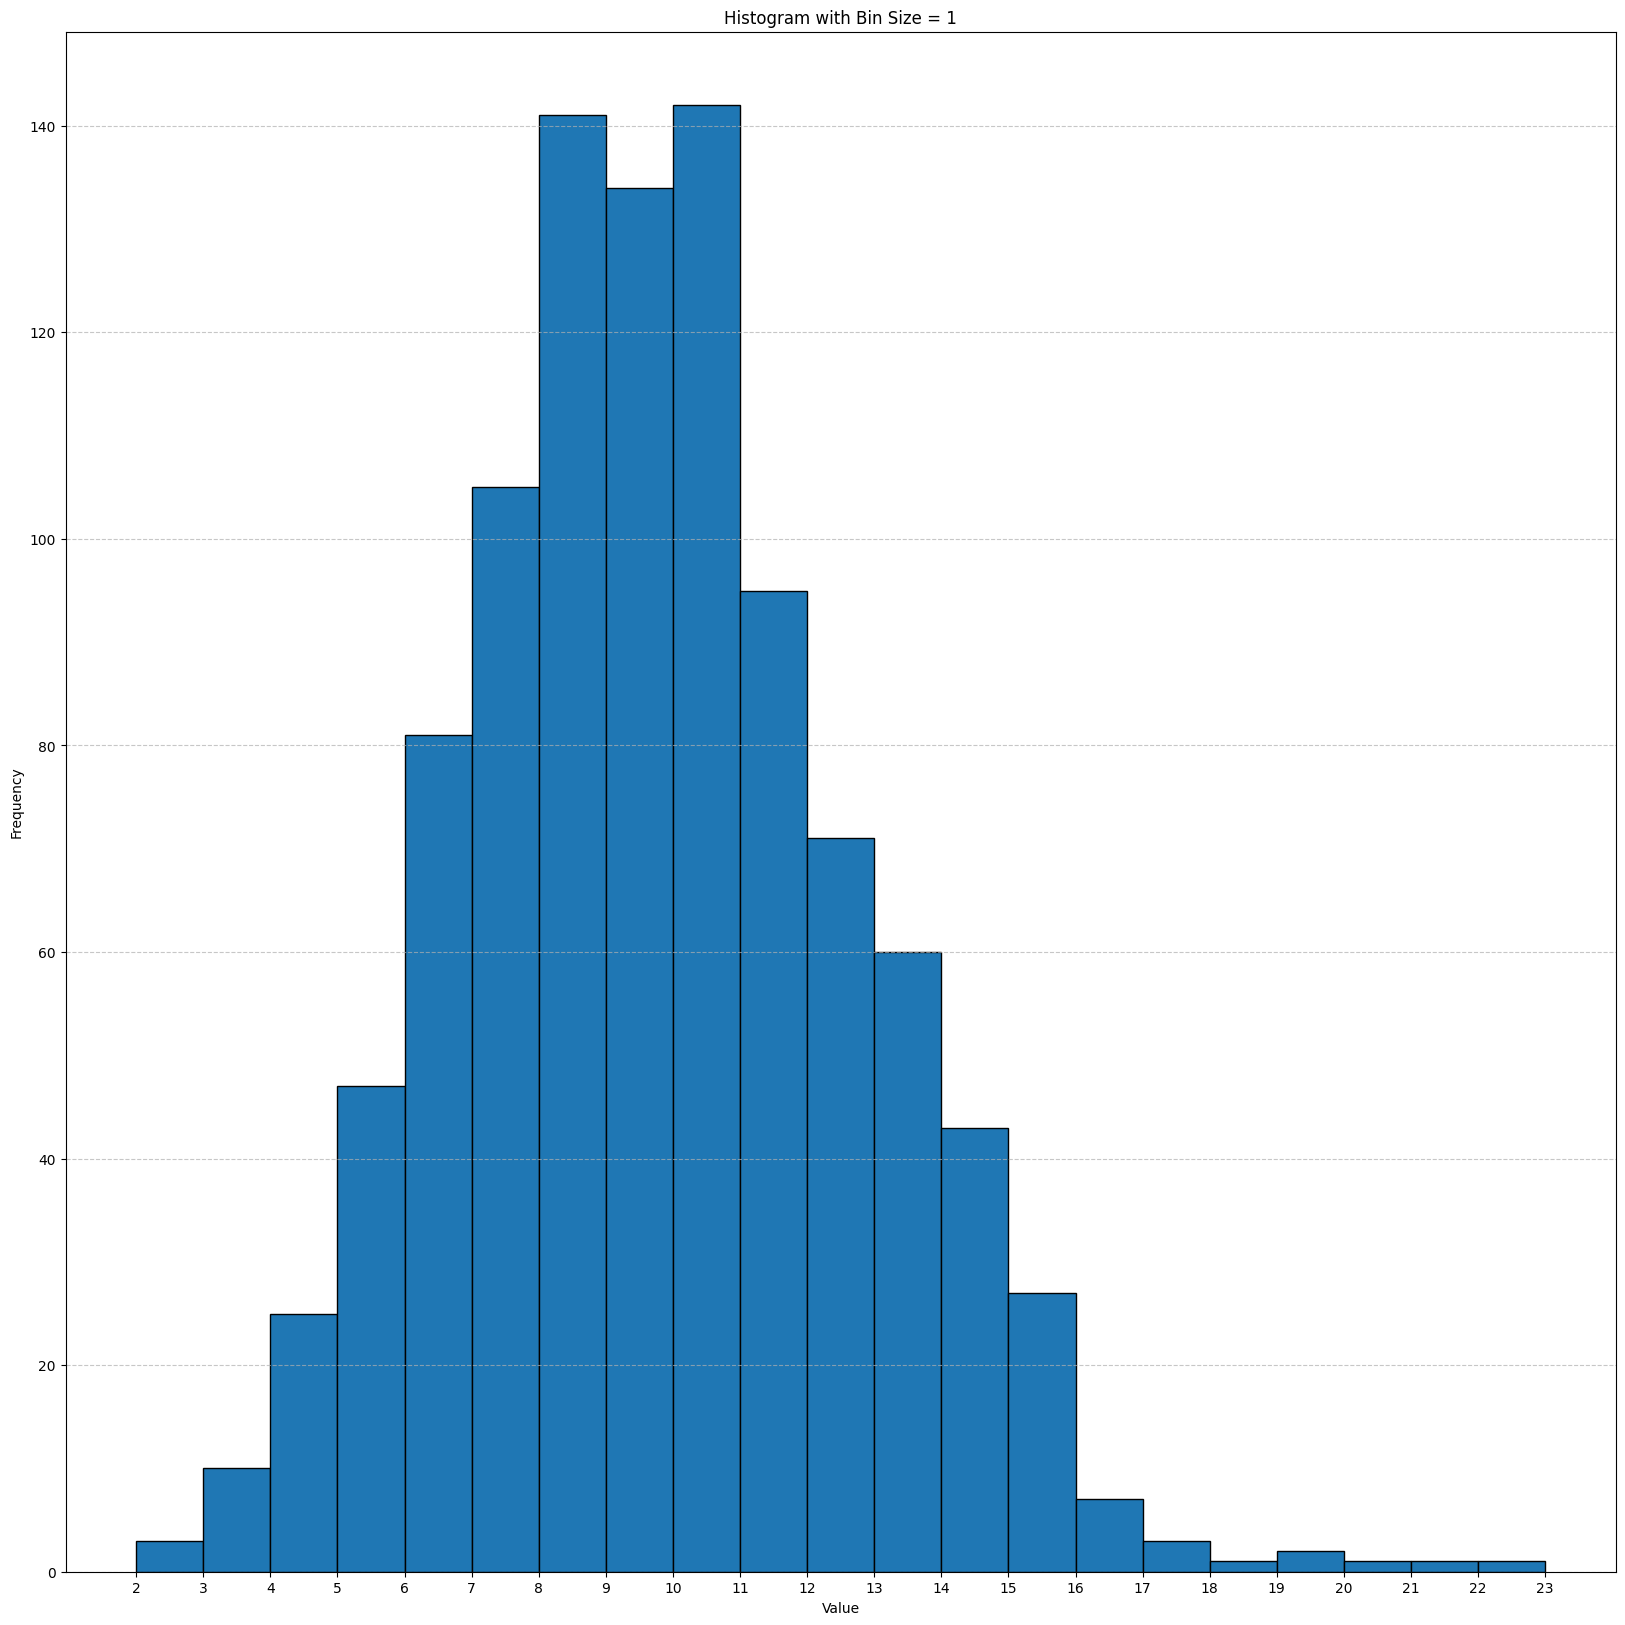

In [12]:
import matplotlib.pyplot as plt

# Sample data
data = intersecting_genes_length_list

# Define bins with size = 1
min_bin = min(data)
max_bin = max(data)
bins = range(min_bin, max_bin + 2)  # +2 to include the last value properly

# Plot
plt.figure(figsize=(20, 20))
plt.hist(data, bins=bins, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Bin Size = 1')
plt.xticks(bins)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
# Always show details
import scipy.stats as stats

# Updated list of observations
observations = intersecting_genes_length_list
# print(observations)
# [7, 7, 4, 7, 10, 2, 7, 10, 5, 10, 1, 0, 5, 4, 6, 7, 6, 9, 5, 1, 8, 7, 2, 10, 7, 9, 3, 11, 9, 0, 9, 5, 5, 2, 0, 12, 3, 6, 4, 2, 9, 5, 3, 2, 8, 2, 0, 6, 6, 1, 12, 3, 1, 3, 8, 12, 8, 0, 6, 4, 0, 7, 2, 7, 10, 2, 7, 3, 3, 1, 13, 8, 11, 8, 1, 6, 3, 0, 6, 5, 7, 2, 2, 7, 0, 11, 7, 9, 10, 8, 2, 4, 8, 7, 0, 3, 5, 0, 4, 8, 6, 4, 8, 1, 3, 5, 6, 6, 6, 0, 4, 6, 4, 2, 4, 4, 5, 10, 10, 0, 5, 3, 1, 7, 5, 2, 0, 0, 3, 0, 7, 8, 10, 6, 3, 4, 2, 8, 8, 0, 7, 5, 0, 7, 6, 5, 1, 0, 9, 7, 1, 13, 2, 10, 3, 9, 9, 5, 1, 5, 6, 7, 1, 2, 10, 8, 7, 1, 7, 6, 9, 5, 0, 11, 0, 0, 6, 2, 1, 1, 1, 6, 4, 9, 8, 4, 5, 9, 4, 15, 9, 0, 2, 0, 1, 3, 10, 3, 9, 3, 4, 2, 1, 7, 4, 1, 1, 5, 3, 4, 14, 0, 0, 5, 5, 8, 7, 0]

# Calculate the proportion of values greater than or equal to 10
value_of_interest = final_gene_number
print(value_of_interest)
count_extreme = sum(x >= value_of_interest for x in observations)
p_value = count_extreme / len(observations)

p_value

14


0.086